<h1 style="color:rgb(0,120,170)">Assignment 6: Factor Analysis</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1 (20 Points): Prove the following Lemma</h2>

Show that for any matrix $X$ and any differentiable scalar-valued function $f$ it holds that 
$$
\frac{\partial f(X^\top X)}{\partial X} = 2{X}\frac{\partial f(X^\top X)}{\partial (X^\top X)}.
$$

########## YOUR SOLUTION HERE ##########

$ \dfrac{\partial f(X^TX)}{\partial X} = 2X \dfrac{\partial f(X^TX)}{\partial (X^TX)}$

we use the chain rule:

$ \dfrac{\partial f(X^TX)}{\partial X} = \sum \dfrac{\partial f(X^TX)}{\partial (X^TX)} \cdot \dfrac{\partial (X^TX)}{\partial X}$

we substitude for A:

$ A = \dfrac{\partial f(X^TX)}{\partial (X^TX)} $

then we get:

$ \dfrac{\partial f(X^TX)}{\partial X} = \sum A \dfrac{\partial (X^TX)}{\partial X} = A \sum \dfrac{\partial (X^TX)}{\partial X} $

using derivation of second order using this rule we get:

$ \dfrac{\partial}{\partial X} \sum_{klmn} X_{kl} X_{mn} = 2 \sum_{kl} X_{kl} $

$ A \sum \dfrac{\partial (X^TX)}{\partial X} = A \sum \dfrac{(X^T + X)}{1} = A \sum (X + X) = 2XA $

we substitude back A we get:

$ 2XA = 2X \dfrac{\partial f(X^TX)}{\partial (X^TX)} $

<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and show that its gradients with respect to the model parameters are 
$$
\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi}) = 2 \mathbf{P}\mathbf{U}
$$
and
$$
\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \operatorname{diag}(\mathbf{P})
$$
, where 
$$
\mathbf{P} = \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \frac12 \mathbf{Q} - \frac{1}{2n} \mathbf{Q} \mathbf{X}^\top \mathbf{X} \mathbf{Q}
$$
and
$$
\mathbf{Q} = (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1}.
$$ 

Hint: use the fact that if $f(\mathbf{A})=f(\mathbf{A}^T)$ holds for a scalar function $f$ and a real square matrix $\mathbf{A}$ it holds that $\nabla_{\mathbf{X}} f(\mathbf{X}^\top \mathbf{X}) = 2 \mathbf{X} \nabla_{\mathbf{X}^\top \mathbf{X}} f(\mathbf{X}^\top \mathbf{X})$. 

########## YOUR SOLUTION HERE ##########

$ log\mathcal L (X,U,\Psi) = -\dfrac{m}{2}log(2\pi) + \dfrac{1}{2} log det (UU^T + \Psi) + \dfrac{1}{2n} \sum^n_i(X^T_i (UU^T + \Psi)^{-1} X_i) $


------------------

$ \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \dfrac{d}{d(UU^T + \Psi)} log\mathcal L =  \dfrac{1}{2}(UU^T + \Psi)^{-1} - \dfrac{1}{2}(UU^T + \Psi)^{-1} (\dfrac{1}{n}\sum^n_i X^T_iX_i)(UU^T + \Psi)^{-1} = \dfrac{1}{2}Q - \dfrac{1}{2n}QX^TXQ$


<h2 style="color:rgb(0,120,170)">Task 3 (20 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

Shape of U: (5, 3)
Shape of Psi: (5,)
Shape of Z: (100, 3)
Shape of X: (100, 5)


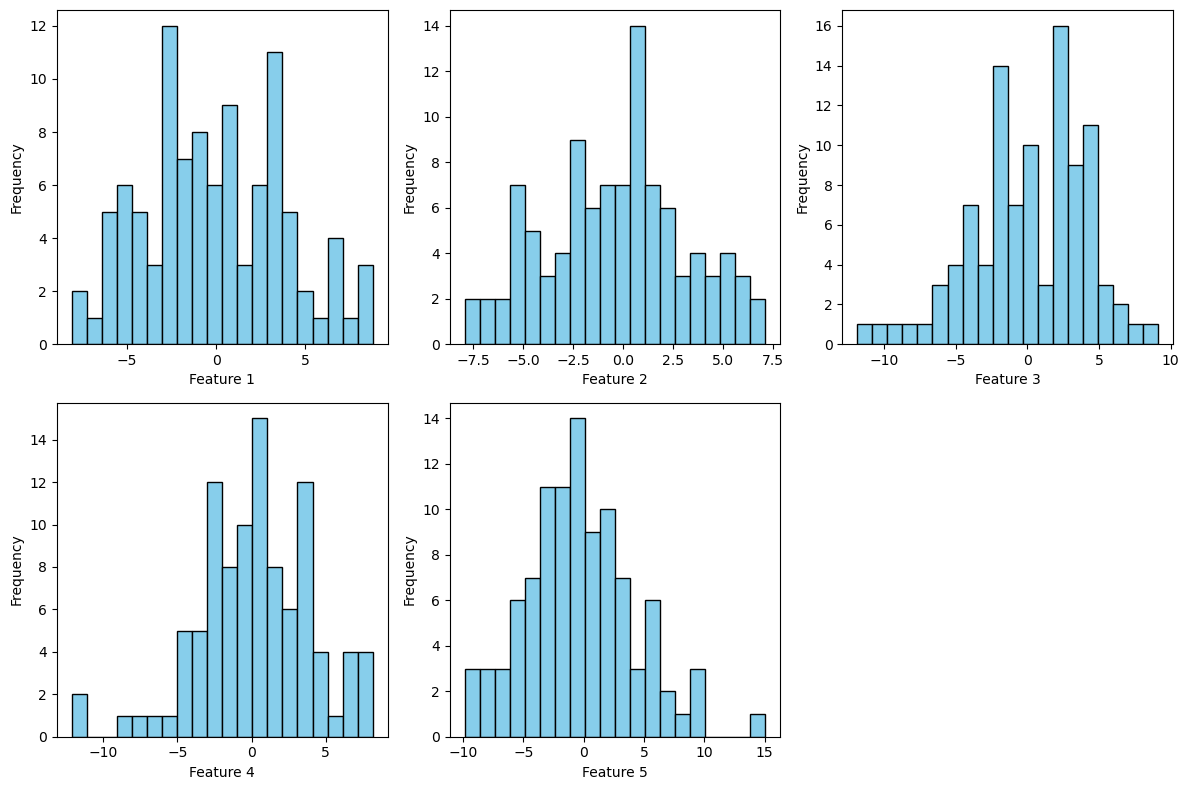

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

########## YOUR SOLUTION HERE ##########
n = 100 
m = 5   
l = 3   

U_ = np.random.randint(-3, 4, size=(m, l))
psi_ = np.random.randint(1, 4, size=m)
Y = np.random.normal(size=(n,l))
E = np.random.multivariate_normal(np.zeros(m), np.diag(psi_),n)
X = Y @ U_.T + E

# Print the shapes of generated matrices
print("Shape of U:", U_.shape)
print("Shape of Psi:", psi_.shape)
print("Shape of Z:", Y.shape)
print("Shape of X:", X.shape)

# Plotting histograms for each feature
plt.figure(figsize=(12, 8))

for i in range(m):
    plt.subplot(2, 3, i+1)
    plt.hist(X[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h2 style="color:rgb(0,120,170)">Task 4 (20 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization.

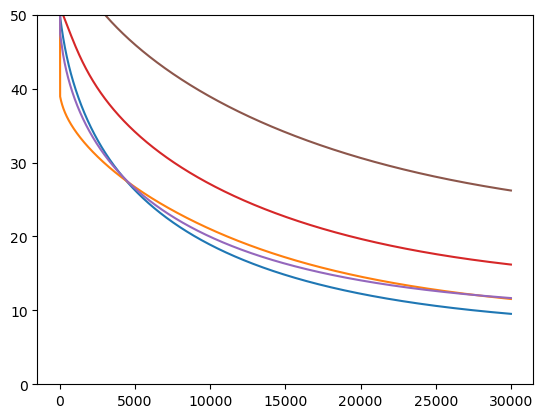

In [2]:
eta = 1e-3
loss_curve = []
np.random.seed(0)
plt.ylim(0,50)

def matrix_inversion(U,psi):
    psi_inv = np.diag(1/psi)
    return psi_inv - psi_inv @ U @ np.linalg.inv(np.eye(l) + U.T @ psi_inv @ U) @ U.T @ psi_inv

def loss(U, psi):
    return np.linalg.norm(U @ U.T + np.diag(psi) - U_ @ U_.T - np.diag(psi_))

for run in range(10):
    U = np.random.uniform(-0.1,0.1, (m,l))
    psi = np.random.uniform(-0.1,0.1, (m))
    loss_curve.append([])
    
    for step in range(30000):
        loss_curve[run].append(loss(U,psi))
        B = matrix_inversion(U,psi)
        
        grad = 1/2 * (B - B @ X.T @ X @ B / n)
        grad_U = 2*grad @ U
        grad_psi = np.diag(grad)
        
        U -= eta * grad_U
        psi -= eta * grad_psi
    
    loss_curve[run].append(loss(U,psi))
    plt.plot(loss_curve[run])

<h2 style="color:rgb(0,120,170)">Task 5 (20 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

Use Speedups from lecture notes!

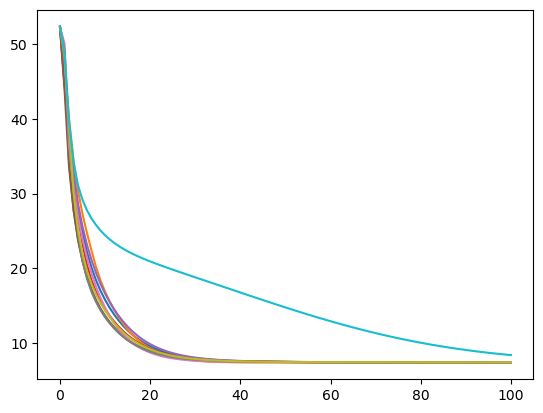

In [3]:
loss_curve = []
C = X.T @ X / n
np.random.seed(0)

for run in range(10):
    U = np.random.uniform(-0.1,0.1, (m,l))
    psi = np.random.uniform(-0.1,0.1, (m))
    loss_curve.append([])
    
    for step in range(100):
        loss_curve[run].append(loss(U,psi))
        B = matrix_inversion(U,psi)
        
        M = X @ B @ U
        S = np.einsum('ij,ik->ijk',M,M)+ np.eye(l) - U.T @ B @ U
        
        P = X.T @ M / n
        U = P @ np.linalg.inv(S.sum(0) / n)
        psi = np.diag(C - P @ U.T)
        
        # using sppedup from lecture notes
        #V = np.diag(1/psi) @ U
        #D = U.T @ V
        #U = C @ (V - V @ np.linalg.inv(np.eye(l) + D) @ D) @ np.linalg.inv(S.sum(0) / n)
        
    
    loss_curve[run].append(loss(U,psi))
    plt.plot(loss_curve[run])